# 모델 평가와 성능향상

In [6]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [7]:
from preamble import *

In [8]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(solver='lbfgs',multi_class='auto').fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


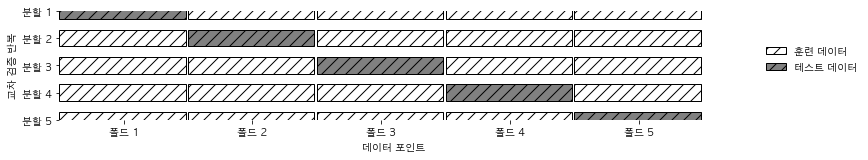

In [9]:
mglearn.plots.plot_cross_validation()

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(multi_class='auto',solver='lbfgs',max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.98  0.941 1.   ]


/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [25]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [26]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target,
                     return_train_score=True)
display(res)

/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.019, 0.018, 0.025]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([0.98 , 0.941, 1.   ]),
 'train_score': array([0.96, 0.99, 0.98])}

In [27]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.02,1.95e-04,0.98,0.96
1,0.02,2.04e-04,0.94,0.99
2,0.02,2.30e-04,1.00,0.98


평균 시간과 점수:
 fit_time       2.08e-02
score_time     2.10e-04
test_score     9.74e-01
train_score    9.77e-01
dtype: float64


### 교차 검증의 장점

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


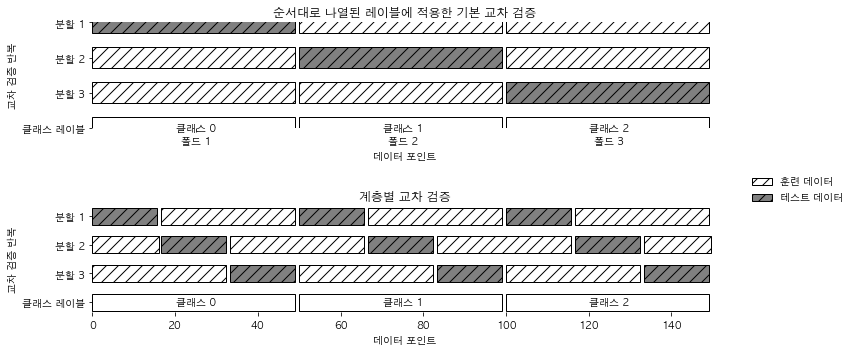

In [29]:
mglearn.plots.plot_stratified_cross_validation()

### 교차 검증 상세 옵션

In [30]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [31]:
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.    1.    0.867 0.933 0.833]


In [32]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [33]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n",
    cross_val_score(logreg, iris.data, iris.target, cv=kfold))


교차 검증 점수:
 [0.98 0.96 0.96]


In [34]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


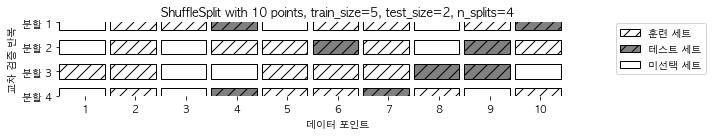

In [35]:
mglearn.plots.plot_shuffle_split()

In [36]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.973 0.973 0.96  0.96  0.907 0.92  0.947 0.92  0.987 0.973]


In [39]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75  0.6   0.667]


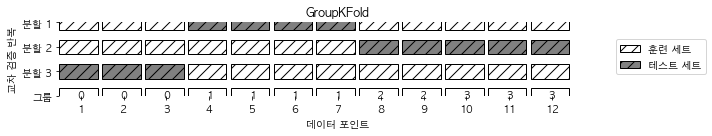

In [40]:
mglearn.plots.plot_group_kfold()

### 그리드 서치


In [41]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
       
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
       
        score = svm.score(X_test, y_test)
       
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


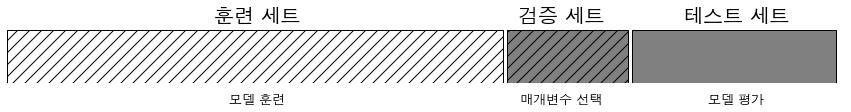

In [42]:
mglearn.plots.plot_threefold_split()

In [45]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
      
        score = svm.score(X_valid, y_valid)
       
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In [46]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


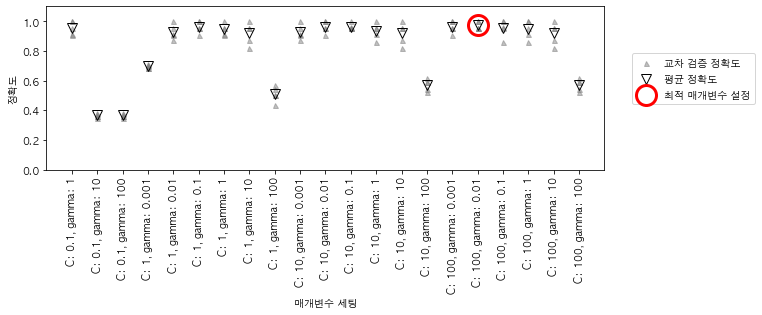

In [47]:
mglearn.plots.plot_cross_val_selection()

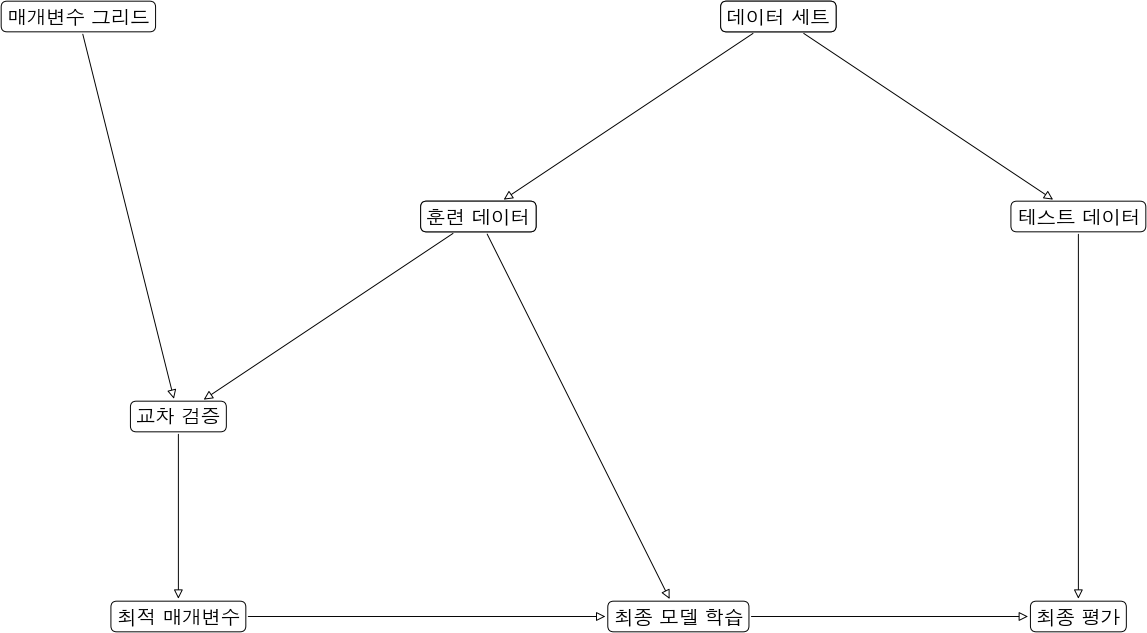

In [48]:
mglearn.plots.plot_grid_search_overview()

In [49]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [52]:
grid_search.fit(X_train, y_train)

/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [54]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [55]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수: 0.97


In [56]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [58]:
import pandas as pd
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00055,0.0005,0.00053,0.00053,0.00052
std_fit_time,0.00012,2.9e-05,6e-06,7.5e-06,5.9e-06
mean_score_time,0.00024,0.00023,0.00024,0.00024,0.00024
std_score_time,4.5e-05,8.2e-06,2.9e-06,4.9e-06,6.9e-06
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.38,0.38,0.38,0.38,0.38
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


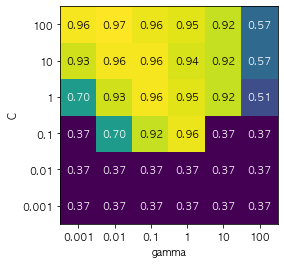

In [60]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


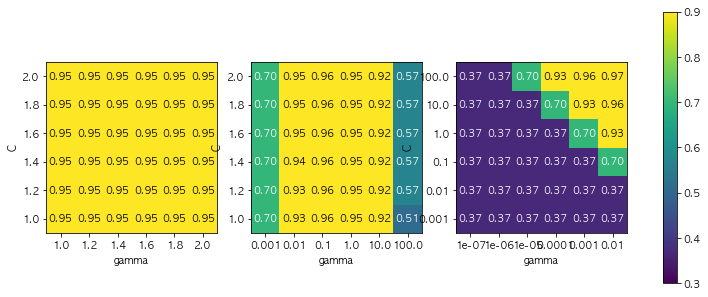

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [63]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [64]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00069,0.00061,0.00061,0.00058,0.00055,0.00055,0.00054,0.00053,0.00054,0.00053,0.0006,0.00078,0.00083,0.00081,0.00063,0.00065,0.00062,0.00065,0.00053,0.00045,0.00036,0.00042,0.00063,0.00059,0.00035,0.00031,0.0003,0.00036,0.00057,0.00059,0.0003,0.00028,0.0003,0.00037,0.00057,0.00059,0.00038,0.00035,0.00031,0.0003,0.0003,0.0003
std_fit_time,0.00015,2.3e-05,1e-05,7.8e-06,3.6e-06,2e-05,2e-05,4.4e-06,6.4e-06,5.6e-06,6.6e-05,6.7e-05,0.00022,0.00026,4.3e-05,6.2e-05,7.9e-06,3.4e-05,1.4e-05,4.6e-05,1.8e-05,8.3e-06,1.9e-05,1.1e-05,5.5e-06,2.7e-05,1.7e-05,5.9e-06,1.8e-05,1e-05,7e-06,1.4e-05,3.1e-05,9.5e-06,1.7e-05,1.2e-05,2.5e-06,1.5e-06,2.7e-06,7.9e-06,1e-05,2.3e-05
mean_score_time,0.00028,0.00028,0.00027,0.00026,0.00025,0.00025,0.00024,0.00024,0.00024,0.00024,0.00026,0.00037,0.0004,0.00034,0.00036,0.0003,0.00027,0.00028,0.00024,0.00023,0.00022,0.00022,0.00022,0.00021,0.00019,0.00019,0.00018,0.00019,0.00021,0.00021,0.00018,0.00018,0.00018,0.00018,0.0002,0.0002,0.00018,0.00018,0.00018,0.00017,0.00019,0.00017
std_score_time,2.1e-05,3.9e-06,1.1e-05,1.8e-06,5.4e-06,1.1e-05,6.1e-06,1.9e-06,1.9e-06,1.7e-06,2.9e-05,5.7e-05,0.00012,6.7e-05,7e-05,4e-05,5e-06,5.2e-05,1.7e-06,1.3e-05,3.8e-06,3.5e-06,9.2e-06,7.4e-06,1.1e-06,1.8e-05,1.5e-06,1.6e-06,1.3e-05,3.9e-06,3.8e-07,8.3e-07,4e-06,1.4e-06,1.4e-06,3.2e-06,8.6e-07,2.1e-06,1.4e-06,1.3e-06,3.2e-05,1.2e-06
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.71,0.92,1,0.38,0.38,0.71,0.88,1,0.92,0.88,0.5,0.88,1,0.96,0.92,0.88,0.54,1,1,0.96,0

In [67]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001


In [69]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
       
        best_parms = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
               
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
       
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
    
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)


In [70]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


In [71]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [72]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [73]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [75]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(solver='lbfgs',C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


# 오차행렬

In [76]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


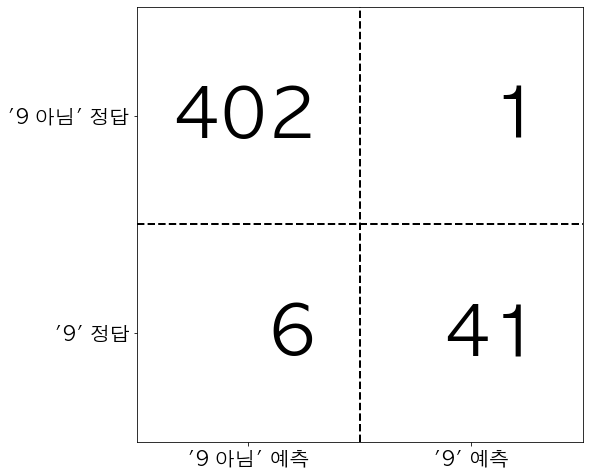

In [77]:
mglearn.plots.plot_confusion_matrix_illustration()

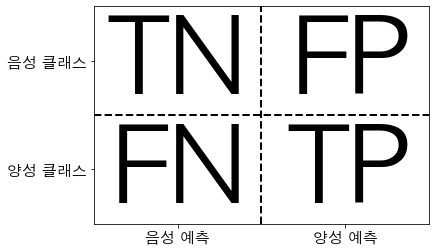

In [78]:
mglearn.plots.plot_binary_confusion_matrix()

In [79]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[362  41]
 [ 44   3]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


In [80]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.07
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.90      0.89       403
           9       0.07      0.06      0.07        47

    accuracy                           0.81       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.81      0.81       450



In [83]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))


              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [84]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

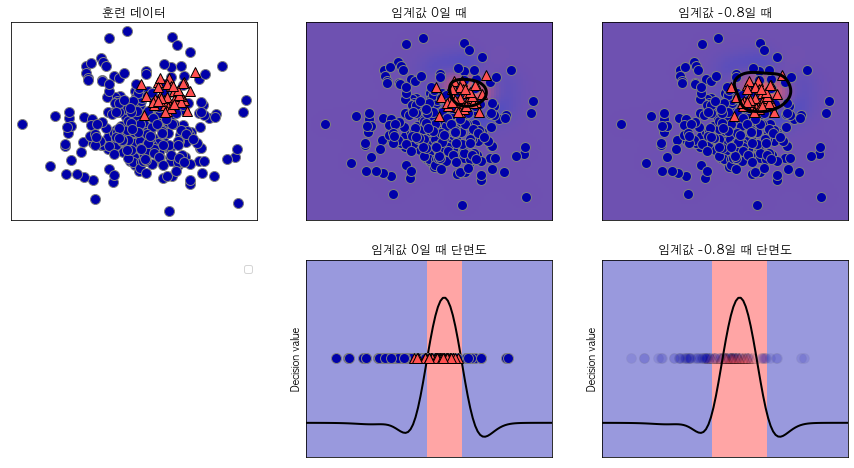

In [85]:
mglearn.plots.plot_decision_threshold()

In [86]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [87]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [88]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [89]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

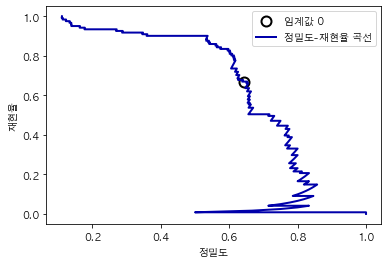

In [90]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

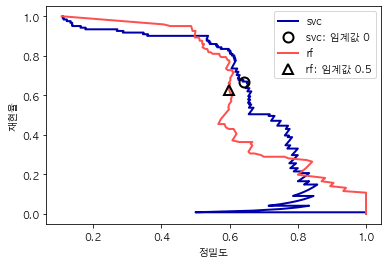

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)


precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [93]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [94]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


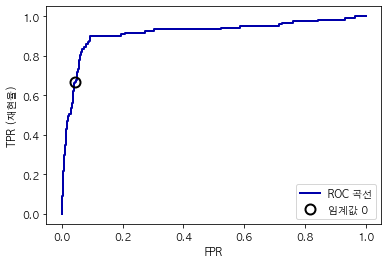

In [95]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

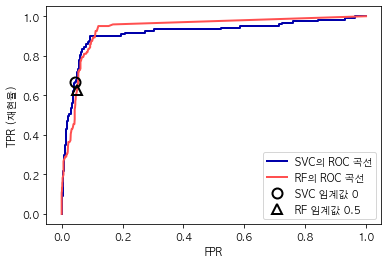

In [96]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)


In [97]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


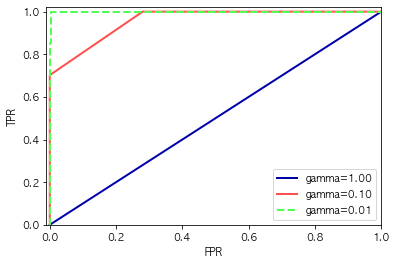

In [98]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [99]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


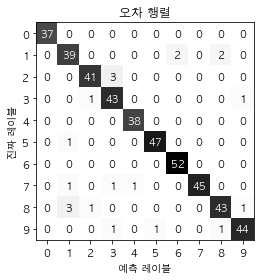

In [100]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [101]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [102]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [105]:
print("기본 평가 지표:",
      cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9, cv=5))

explicit_accuracy =  cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap =  cross_val_score(SVC(gamma='auto'), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)


기본 평가 지표: [0.9 0.9 0.9 0.9 0.9]
정확도 지표: [0.9 0.9 0.9 0.9 0.9]
평균 정밀도 지표: [0.98  0.977 0.978 0.99  0.955]


In [ ]:
res = cross_validate(SVC(gamma='auto'), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))